In [1]:
## Loading the dataset
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
print(F"Class labels: {np.unique(y)}")

Class labels: [0 1 2]


In [4]:
## Splitting datasets into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.3, random_state=1, stratify=y)

In [5]:
print(f"Lable count in y: {np.bincount(y)}")
print(f"Label count in y_train: {np.bincount(y_train)}")
print(f"Label count in y_test: {np.bincount(y_test)}")

Lable count in y: [50 50 50]
Label count in y_train: [35 35 35]
Label count in y_test: [15 15 15]


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
## Using decision tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                   max_depth=4,
                                   random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

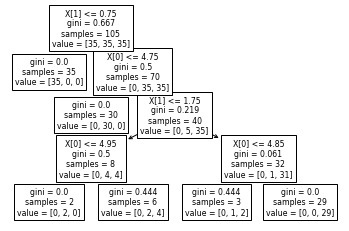

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(tree_model)
plt.show()

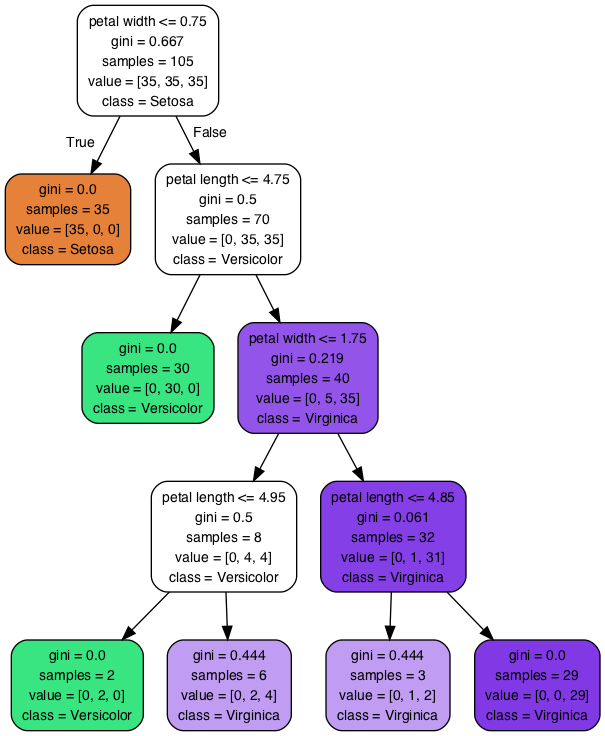

In [11]:
from PIL import Image
import glob

path = glob.glob('tree.png')
Image.open(path[0])

In [ ]:
conda install pydotplus

In [10]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/ishandahal/miniconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       he60d9cb_2         861 KB
    expat-2.2.9                |       hb1e8313_2         112 KB
    fontconfig-2.12.6          |       h9850fc5_0         201 KB
    freetype-2.8               |       h12048fb_1         541 KB
    fribidi-1.0.10             |       haf1e3a3_0          63 KB
    gettext-0.19.8.1           |       hb0f4f8b_2         2.7 MB
    glib-2.65.0                |       hc5f4afa_0         2.7 MB
    graphite2-1.3.14           |       h38d11af_0          80 KB


In [12]:
conda install pyparsing

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [9]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                          filled=True,
                          rounded=True,
                          class_names=["Setosa",
                                      'Versicolor',
                                      'Virginica'],
                          feature_names=['petal length',
                                         'petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")

True

In [10]:
## Combining decision trees via random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                               n_estimators=25,
                               random_state=1,
                               n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [13]:
correct_num = forest.predict(X_test) == y_test
total_test_set = len(y_test)
rate_correct = correct_num.sum() / total_test_set

In [14]:
print("Percent of correc")

0.9777777777777777